In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [189]:
vacc=pd.read_csv("D:\\Downloads\\vaccinations.csv", sep = ',')
tweets=pd.read_csv("D:\\Downloads\\vaccination_all_tweets.csv", sep = ',')

In [190]:
vacc.head(5)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0


In [191]:
vacc.columns

Index(['location', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'daily_vaccinations_per_million'],
      dtype='object')

In [192]:
vacc=vacc.groupby('date')['daily_vaccinations'].sum().reset_index()

In [193]:
vacc.set_index('date',inplace=True)

In [194]:
vacc.index = pd.to_datetime(vacc.index)

In [195]:
tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


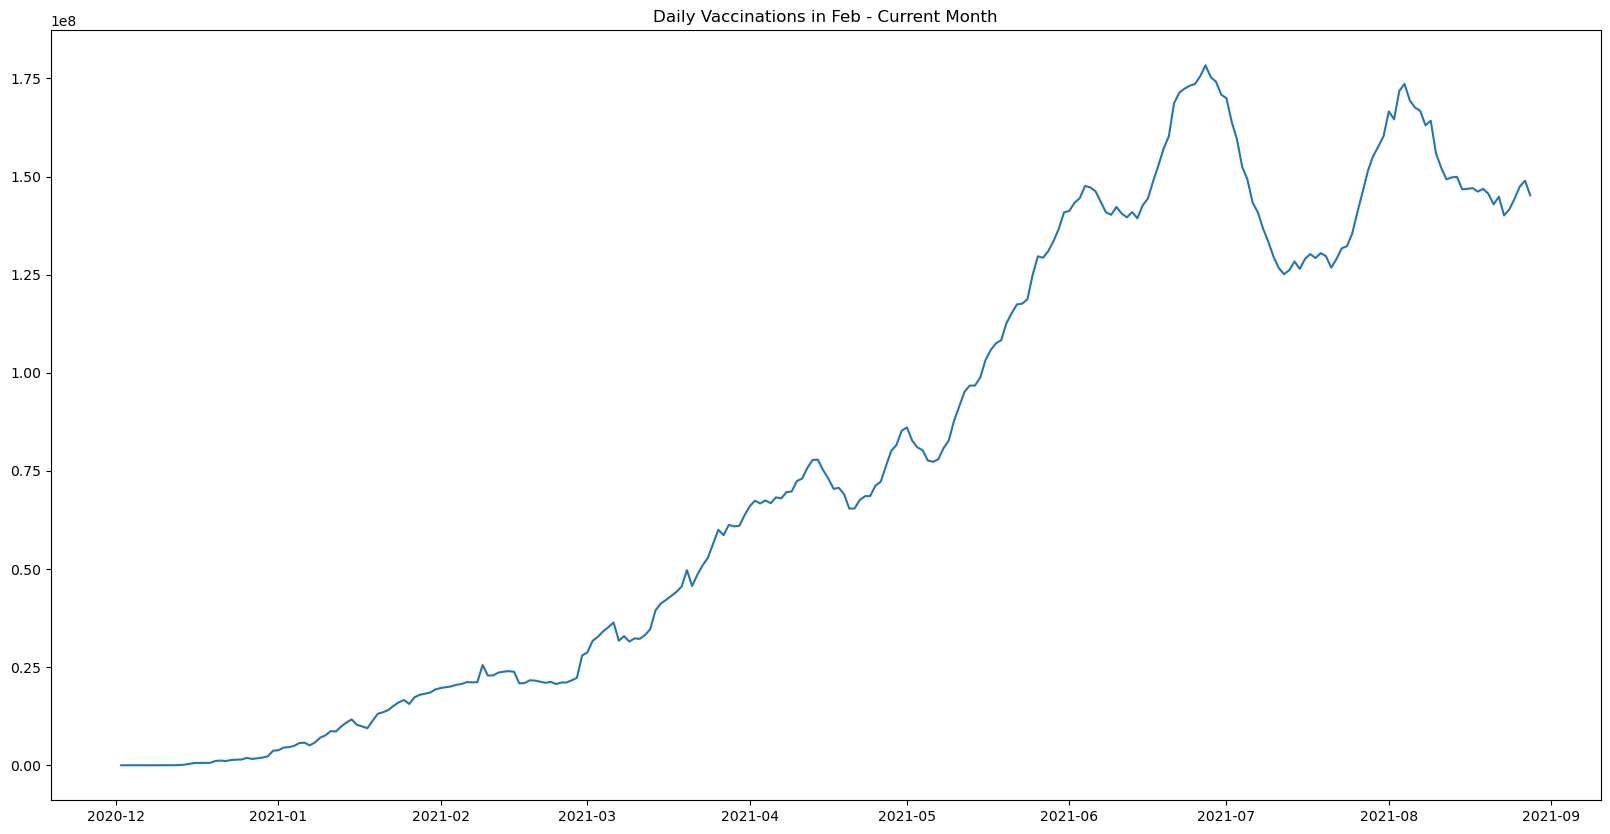

In [196]:
plt.figure(figsize=(20, 10))
plt.plot(vacc['daily_vaccinations'])
plt.title('Daily Vaccinations in Feb - Current Month')
plt.show()

In [197]:
tweets['datedt'] = pd.to_datetime(tweets['date'])
tweets['date_only'] = tweets['datedt'].dt.date

In [198]:
tweets_agg_df = tweets.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [199]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

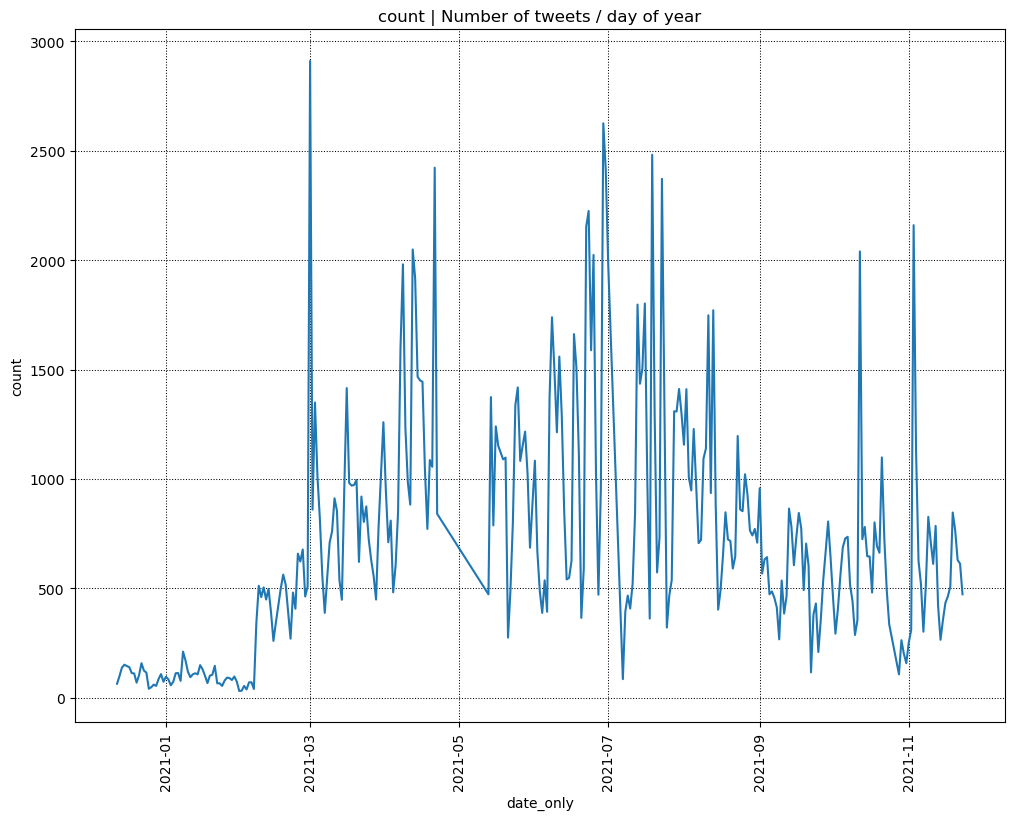

In [200]:
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)

In [201]:
tweets_agg_df['date_only'] = pd.to_datetime(tweets_agg_df['date_only'])

In [202]:
tweets_agg_df=tweets_agg_df[(tweets_agg_df['date_only'] >= '2020-12-02') & (tweets_agg_df['date_only'] <= '2021-08-28')]

In [203]:
tweets_agg_df = tweets_agg_df.set_index(['date_only'])

In [204]:
tweets_agg_df

,count
date_only,
2020-12-12,63
2020-12-13,98
2020-12-14,137
2020-12-15,150
2020-12-16,144
...,...
2021-08-24,860
2021-08-25,852
2021-08-26,1021


In [205]:
tweets_agg_df.index

DatetimeIndex(['2020-12-12', '2020-12-13', '2020-12-14', '2020-12-15',
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-19',
               '2020-12-20', '2020-12-21',
               ...
               '2021-08-19', '2021-08-20', '2021-08-21', '2021-08-22',
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-28'],
              dtype='datetime64[ns]', name='date_only', length=235, freq=None)

In [206]:
vacc.index

DatetimeIndex(['2020-12-02', '2020-12-03', '2020-12-04', '2020-12-05',
               '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09',
               '2020-12-10', '2020-12-11',
               ...
               '2021-08-19', '2021-08-20', '2021-08-21', '2021-08-22',
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-28'],
              dtype='datetime64[ns]', name='date', length=270, freq=None)

In [207]:
vacc

,daily_vaccinations
date,
2020-12-02,0.0
2020-12-03,0.0
2020-12-04,0.0
2020-12-05,0.0
2020-12-06,0.0
...,...
2021-08-24,141618411.0
2021-08-25,144342936.0
2021-08-26,147456968.0


In [208]:
vacc=vacc['daily_vaccinations'][tweets_agg_df.index]

In [209]:
vacc

date_only
2020-12-12        15297.0
2020-12-13        50750.0
2020-12-14       139627.0
2020-12-15       371204.0
2020-12-16       580596.0
                 ...     
2021-08-24    141618411.0
2021-08-25    144342936.0
2021-08-26    147456968.0
2021-08-27    148928388.0
2021-08-28    145209039.0
Name: daily_vaccinations, Length: 235, dtype: float64

H0: Количество твитов не влияет на количество вакцинированных

In [152]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(pd.DataFrame([tweets_agg_df['count'], vacc]).transpose(), maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.1025  , p=0.0001  , df_denom=225, df_num=3
ssr based chi2 test:   chi2=21.9704 , p=0.0001  , df=3
likelihood ratio test: chi2=20.9914 , p=0.0001  , df=3
parameter F test:         F=7.1025  , p=0.0001  , df_denom=225, df_num=3


{3: ({'ssr_ftest': (7.1024862969835265, 0.0001400444231899132, 225.0, 3),
   'ssr_chi2test': (21.970357612002374, 6.616409903570136e-05, 3),
   'lrtest': (20.99140320467086, 0.00010570984587596594, 3),
   'params_ftest': (7.102486296338486, 0.00014004442330840737, 225.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

р < 0.05, следовательно нулевая гипотеза отвергается и твиты влияют на количество вакцинированных

In [157]:
grangercausalitytests(pd.DataFrame([tweets_agg_df['count'], vacc]).transpose(), maxlag=[25])


Granger Causality
number of lags (no zero) 25
ssr based F test:         F=1.0688  , p=0.3845  , df_denom=159, df_num=25
ssr based chi2 test:   chi2=35.2919 , p=0.0831  , df=25
likelihood ratio test: chi2=32.6217 , p=0.1408  , df=25
parameter F test:         F=1.0688  , p=0.3845  , df_denom=159, df_num=25


{25: ({'ssr_ftest': (1.0688397733182646, 0.384479038902605, 159.0, 25),
   'ssr_chi2test': (35.29187930767855, 0.08305262349332145, 25),
   'lrtest': (32.62167611912082, 0.1408002867424977, 25),
   'params_ftest': (1.06883977333791, 0.38447903887924384, 159.0, 25.0)},
   array([[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 1., 0., 0.],
          [0., 0., 0., ..., 0., 1., 0.]])])}

In [156]:
grangercausalitytests(pd.DataFrame([tweets_agg_df['count'], vacc]).transpose(), maxlag=[10])


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.5410  , p=0.1269  , df_denom=204, df_num=10
ssr based chi2 test:   chi2=16.9967 , p=0.0744  , df=10
likelihood ratio test: chi2=16.3853 , p=0.0891  , df=10
parameter F test:         F=1.5410  , p=0.1269  , df_denom=204, df_num=10


{10: ({'ssr_ftest': (1.5410337080716523, 0.1268939554143525, 204.0, 10),
   'ssr_chi2test': (16.996695309613813, 0.07443713617709706, 10),
   'lrtest': (16.385325325565645, 0.08912057106259699, 10),
   'params_ftest': (1.5410337081235705, 0.12689395539701082, 204.0, 10.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        

р > 0.05, следовательно нулевая гипотеза принимается и твиты не влияют на количество вакцинированных

А теперь наоборот
H0: Количествоо вакцинированных влияет на количество твитов

In [159]:
grangercausalitytests(pd.DataFrame([vacc, tweets_agg_df['count']]).transpose(), maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5576  , p=0.2006  , df_denom=225, df_num=3
ssr based chi2 test:   chi2=4.8181  , p=0.1856  , df=3
likelihood ratio test: chi2=4.7688  , p=0.1895  , df=3
parameter F test:         F=1.5576  , p=0.2006  , df_denom=225, df_num=3


{3: ({'ssr_ftest': (1.5575772125745022, 0.20055051673053464, 225.0, 3),
   'ssr_chi2test': (4.8181055108971265, 0.18561127847294406, 3),
   'lrtest': (4.768757100899165, 0.189534402533642, 3),
   'params_ftest': (1.5575772125745757, 0.20055051673051655, 225.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

р > 0.05, следовательно нулевая гипотеза принимается и вакцинированные не влияют на количество твитов

In [160]:
grangercausalitytests(pd.DataFrame([vacc, tweets_agg_df['count']]).transpose(), maxlag=[5])


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.4731  , p=0.1997  , df_denom=219, df_num=5
ssr based chi2 test:   chi2=7.7353  , p=0.1714  , df=5
likelihood ratio test: chi2=7.6081  , p=0.1792  , df=5
parameter F test:         F=1.4731  , p=0.1997  , df_denom=219, df_num=5


{5: ({'ssr_ftest': (1.4730690927590129, 0.1997079512649123, 219.0, 5),
   'ssr_chi2test': (7.735294322707146, 0.17144012578357867, 5),
   'lrtest': (7.608063523120109, 0.179199960526471, 5),
   'params_ftest': (1.4730690927589754, 0.19970795126492374, 219.0, 5.0)},
   array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

р > 0.05, следовательно нулевая гипотеза принимается и вакцинированные не влияют на количество твитов

In [161]:
grangercausalitytests(pd.DataFrame([vacc, tweets_agg_df['count']]).transpose(), maxlag=[10])


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.9628  , p=0.4771  , df_denom=204, df_num=10
ssr based chi2 test:   chi2=10.6195 , p=0.3879  , df=10
likelihood ratio test: chi2=10.3765 , p=0.4081  , df=10
parameter F test:         F=0.9628  , p=0.4771  , df_denom=204, df_num=10


{10: ({'ssr_ftest': (0.9628342616136446, 0.4770868097324623, 204.0, 10),
   'ssr_chi2test': (10.619495532503434, 0.3879204410722357, 10),
   'lrtest': (10.376503782686086, 0.4081050902200021, 10),
   'params_ftest': (0.9628342616136557, 0.47708680973245143, 204.0, 10.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          

р > 0.05, следовательно нулевая гипотеза принимается и вакцинированные не влияют на количество твитов

Приходим к выводу, что количество вакцинированных не влияет на количество твитов и наоборот

А теперь ручками

In [224]:
def var(data, order, amount):
    kfs = np.ones(order)
    X_mat = []
    
    for i in range(order,len(data)-1):
        X_mat.append(data[i-order:i])
    X_mat = np.array(X_mat)
    
    kfs = np.linalg.lstsq(X_mat, data[order+1:len(data)])
    vect = data.values
    for i in range(amount):
        pred = kfs[0]@vect[-order:]
        vect = np.append(vect, pred)
    kmat = np.zeros((len(kfs[0]), len(kfs[0])))
    for i in range(len(kfs[0])):
        kmat[i,i] = kfs[0][i]
    eigen = np.linalg.eig(kmat)
    return vect

In [226]:
daily_vac = vacc
daily_tweet = tweets_agg_df["count"]


predict_range = 10
lag = len(daily_vac) - predict_range - 2

pred = var(daily_vac[:int(len(daily_vac)) - predict_range], lag ,predict_range)

C:\Users\tushk\AppData\Local\Temp\ipykernel_12540\2871870300.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  kfs = np.linalg.lstsq(X_mat, data[order+1:len(data)])


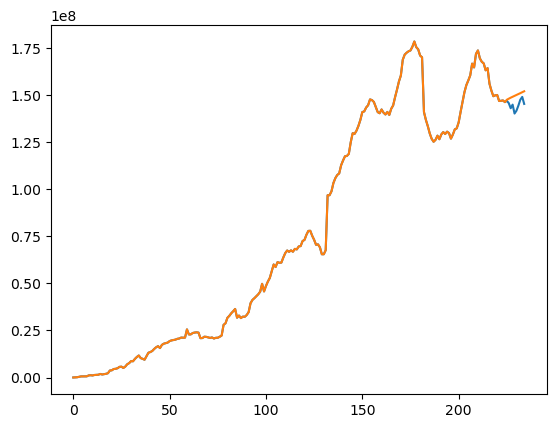

In [227]:
plt.plot(daily_vac.values)
plt.plot(pred)

In [228]:
def co_var(X, Y, order_x, order_y, amount):
    kfs = np.ones(order_x + order_y)
    
    # Создание лагированных временных рядов
    X_lagged = np.array([X[i:order_x + i] for i in range(len(X) - order_x - 1)])
    Y_lagged = np.array([Y[i:order_y + i] for i in range(len(Y) - order_y - 1)])

    # Формирование матрицы для теста
    XY_matrix = np.column_stack((X_lagged, Y_lagged))

    kfs = np.linalg.lstsq(XY_matrix, X[order_x+1:len(X)])
    vect_X = X.values
    vect_Y = Y.values
    for i in range(amount):
        pred = kfs[0]@ np.concatenate((vect_X[-order_x:], vect_Y[- order_y:]))
        vect_X = np.append(vect_X, pred)
    kmat = np.zeros((len(kfs[0]), len(kfs[0])))
    for i in range(len(kfs[0])):
        kmat[i,i] = kfs[0][i]
    #eigen = np.linalg.eig(kmat)
    return vect_X

In [229]:

lag = len(daily_vac) - predict_range - 2
pred_lag = co_var(daily_vac[:int(len(daily_vac)) - predict_range], \
    daily_tweet[:int(len(daily_vac)) - predict_range], \
    lag, lag, predict_range)

C:\Users\tushk\AppData\Local\Temp\ipykernel_12540\1052652445.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  kfs = np.linalg.lstsq(XY_matrix, X[order_x+1:len(X)])


C:\Users\tushk\AppData\Local\Temp\ipykernel_12540\1052652445.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  kfs = np.linalg.lstsq(XY_matrix, X[order_x+1:len(X)])


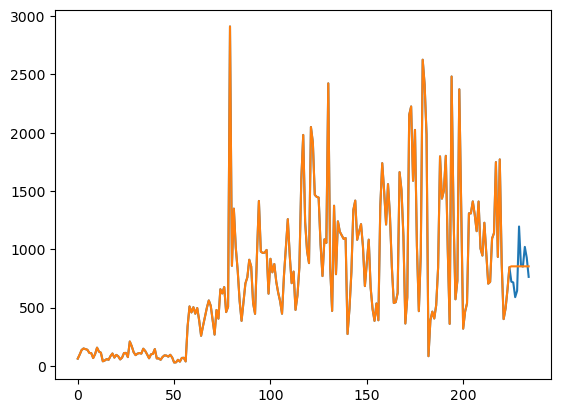

In [230]:
pred_lag = co_var(daily_tweet[:int(len(daily_vac)) - predict_range], \
    daily_vac[:int(len(daily_vac)) - predict_range], \
    lag, lag, predict_range)
plt.plot(daily_tweet.values)
plt.plot(pred_lag)

In [231]:
from scipy.stats import f
import scipy.stats as stats

In [242]:
variance1 = np.var(pred)
variance2 = np.var(pred_lag)
 
# Calculate the F-statistic
f_value = variance2 / variance1
 
# Calculate the degrees of freedom
df1 = len(pred) - 1
df2 = len(pred_lag) - 1
 
# Calculate the p-value
p_value = stats.f.cdf(f_value, df2, df1)

In [246]:
df2

234

In [244]:
f_value

9.531159482065396e-11

In [245]:
p_value

0.0